In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [44]:
data = pd.read_csv('listings.csv', encoding='latin-1')

# EDA Analysis 

In [76]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

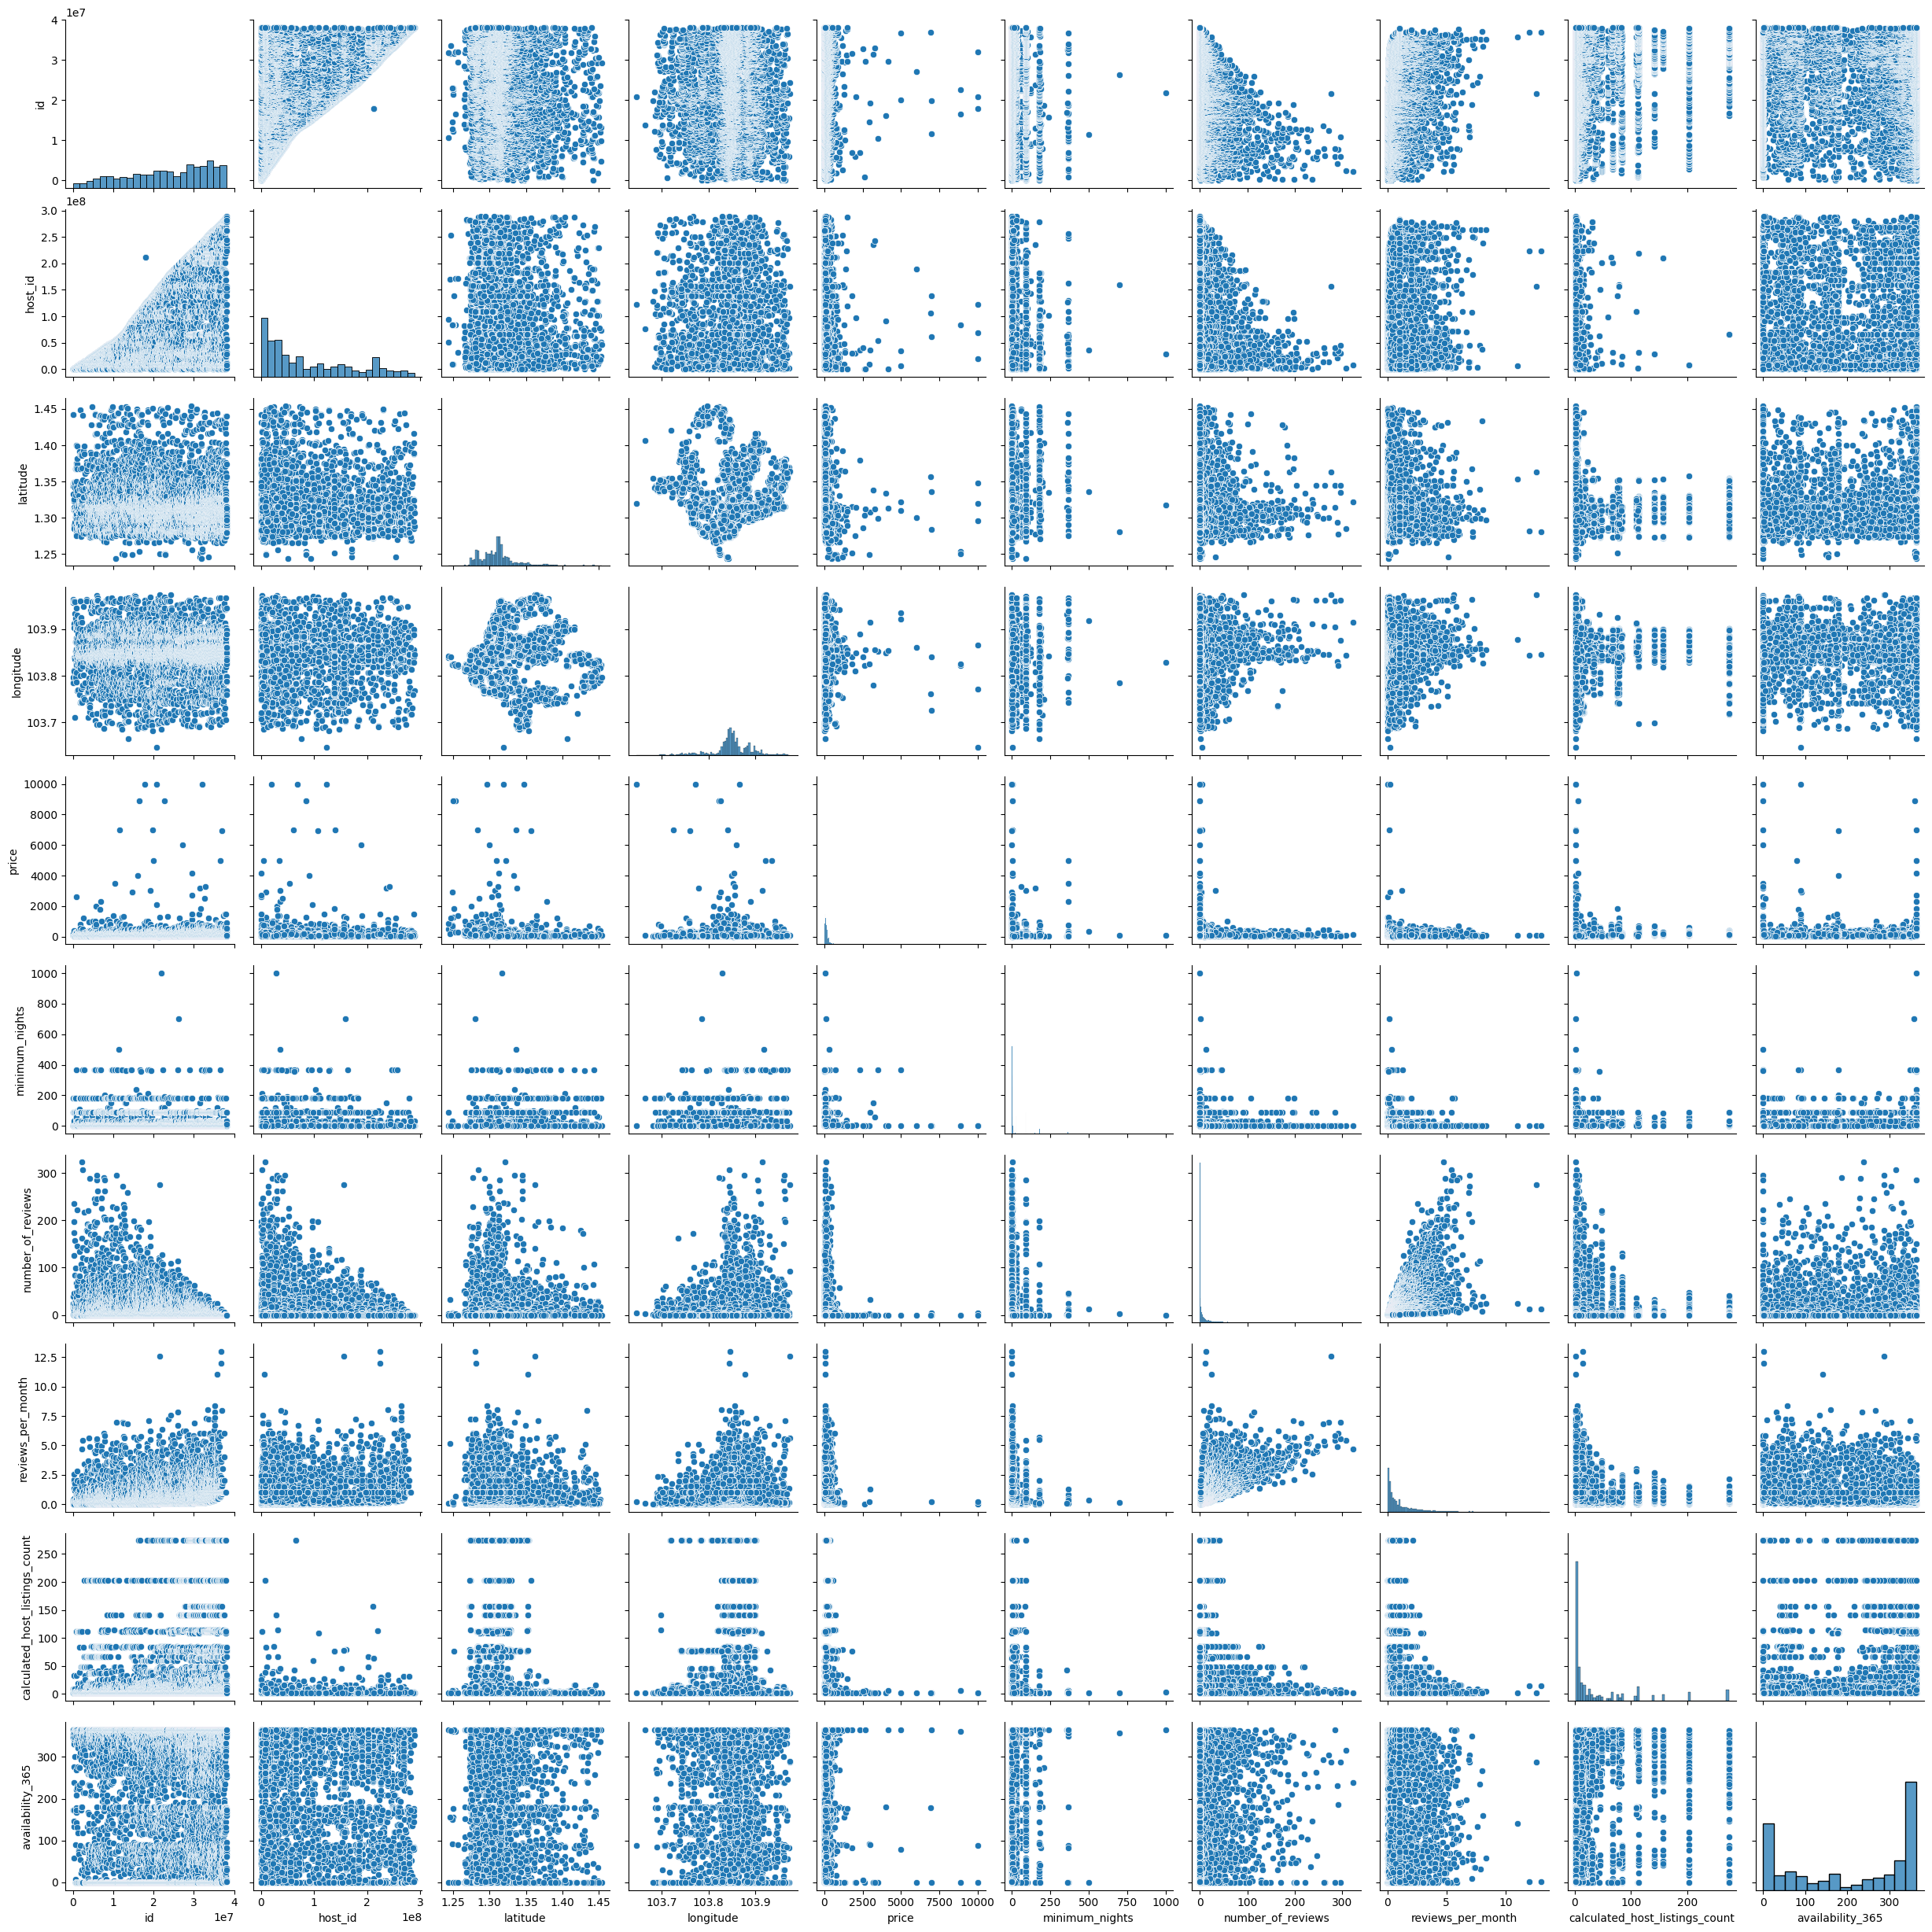

In [4]:
sns.pairplot(data)
plt.show()


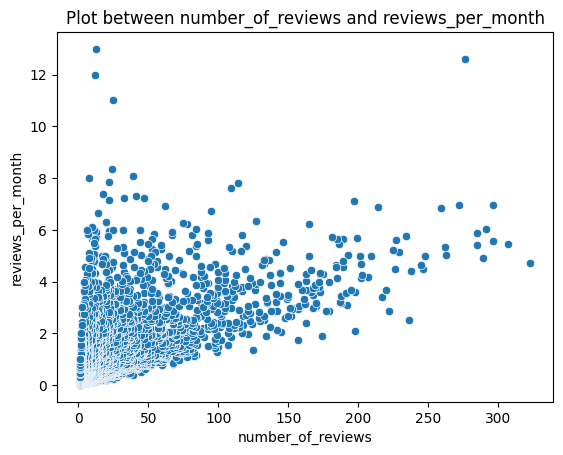

In [7]:
sns.scatterplot(x=data['number_of_reviews'], y=data['reviews_per_month'])
plt.title('Plot between number_of_reviews and reviews_per_month')
plt.show()

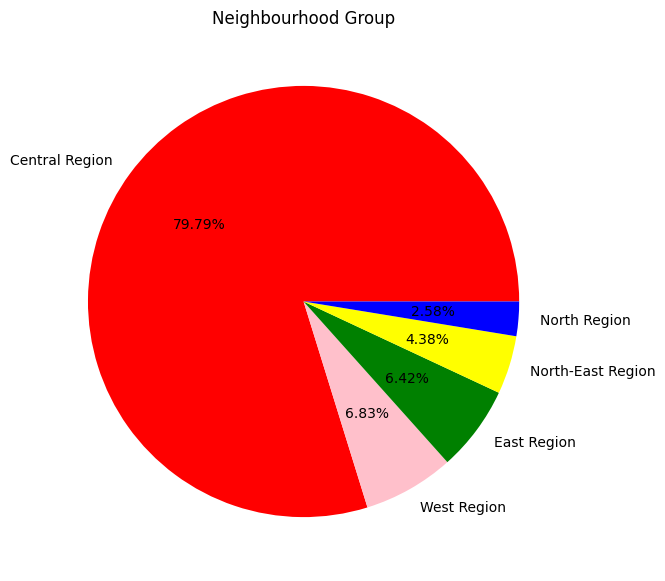

In [8]:
labels = data.neighbourhood_group.value_counts().index
colors = ['red','pink','green','yellow','blue']
explode = [0,0,0,0,0]
sizes = data.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Neighbourhood Group')
plt.show()

- As we can see, the scatter plot shows a positive shape. So in essence, the more a place is reviewed, the higher the accumulated reviews per months

- From this fact, we can use it to predict and help users to choose a popular places/properties. 

C:\Windows\Temp\ipykernel_6276\1934383264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="price",x ='neighbourhood_group' ,data = data,  palette="Set1")


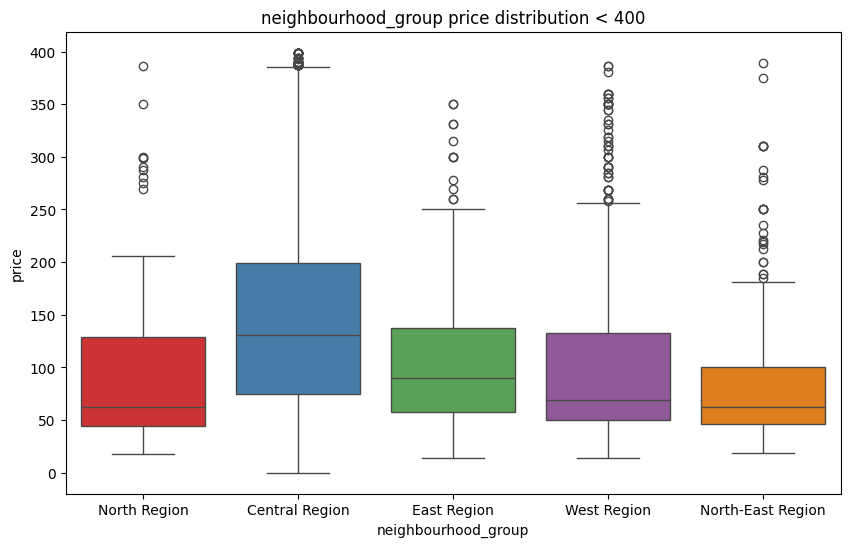

In [9]:
data = data[data.price < 400]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = data,  palette="Set1")
plt.title("neighbourhood_group price distribution < 400")
plt.show()

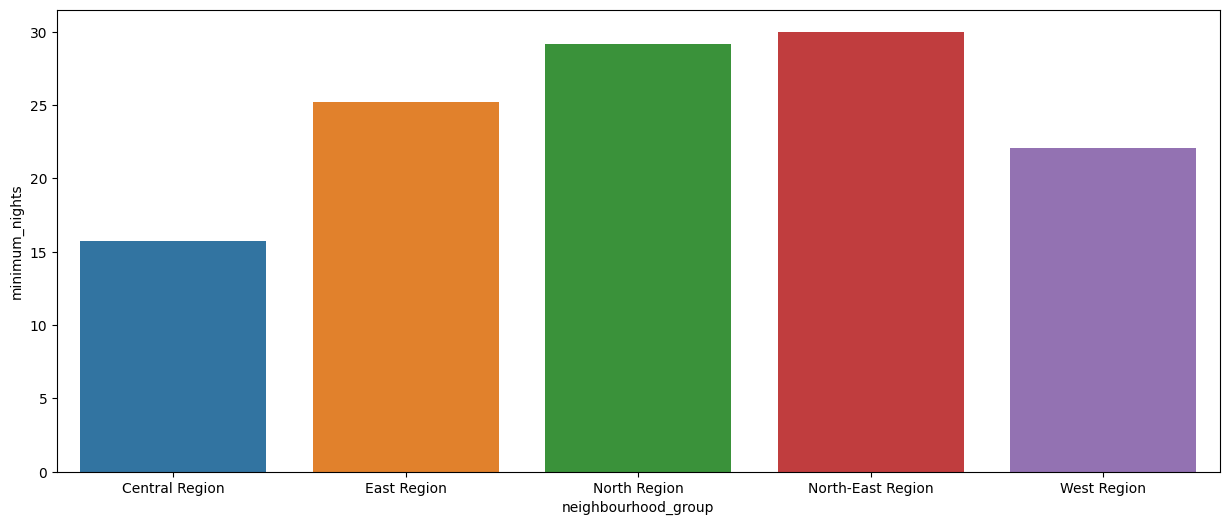

In [10]:
plt.figure(figsize=(15,6))
min_nights_mean = data[['minimum_nights','neighbourhood_group']]
min_nights_mean = min_nights_mean[min_nights_mean.minimum_nights<1000000]
min_nights_mean = min_nights_mean.groupby(['neighbourhood_group'])['minimum_nights'].mean().reset_index()
sns.barplot(x='neighbourhood_group', y='minimum_nights', data=min_nights_mean, hue=min_nights_mean.neighbourhood_group)
plt.show()

- after I made pie, box, and bar plot, the conclusion is that Central Region is the highest user demand but has expensive prices, so the central region has the smallest average minimum per nights

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

- we can see the name, last_review and reviews_per_months have a different count with the others column/features

In [15]:
data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

- there are 2758 data that have a null value in the last_review and reviews_per_month also 2 data in the name

# Data Prepocessing 

In [45]:
data = data.drop(columns=['id', 'host_id', 'name', 'host_name', 'calculated_host_listings_count','latitude', 'longitude','last_review'])

- I decide to drop some unnesecery columns for data pre-processing

In [46]:
data.loc[(data['number_of_reviews'] == 0) & (data['reviews_per_month'].isnull()), 'reviews_per_month'] = 0

- for places/properties that have been not reviewed, the reviews_per_month value will be replaced with 0

In [47]:
data.isnull().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64

In [49]:
rt_encoded = pd.get_dummies(data['room_type']).astype(int)
rt_encoded.columns = ['room_type: ' + col for col in rt_encoded.columns]
data = pd.concat([data, rt_encoded], axis=1)
data = data.drop(columns=['room_type'])
data

,neighbourhood_group,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type: Entire home/apt,room_type: Private room,room_type: Shared room
0,North Region,Woodlands,83,180,1,0.01,365,0,1,0
1,Central Region,Bukit Timah,81,90,18,0.28,365,0,1,0
2,North Region,Woodlands,69,6,20,0.20,365,0,1,0
3,East Region,Tampines,206,1,14,0.15,353,0,1,0
4,East Region,Tampines,94,1,22,0.22,355,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7902,Central Region,Queenstown,100,3,0,0.00,61,1,0,0
7903,Central Region,Tanglin,550,6,0,0.00,365,1,0,0
7904,Central Region,Kallang,58,30,0,0.00,173,0,1,0
7905,Central Region,River Valley,56,14,0,0.00,30,0,1,0


In [50]:
nhg_encoded = pd.get_dummies(data['neighbourhood_group']).astype(int)
nhg_encoded.columns = ['neighbourhood_group: ' + col for col in nhg_encoded.columns]
data = pd.concat([data, nhg_encoded], axis=1)
data = data.drop(columns=['neighbourhood_group'])
data

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type: Entire home/apt,room_type: Private room,room_type: Shared room,neighbourhood_group: Central Region,neighbourhood_group: East Region,neighbourhood_group: North Region,neighbourhood_group: North-East Region,neighbourhood_group: West Region
0,Woodlands,83,180,1,0.01,365,0,1,0,0,0,1,0,0
1,Bukit Timah,81,90,18,0.28,365,0,1,0,1,0,0,0,0
2,Woodlands,69,6,20,0.20,365,0,1,0,0,0,1,0,0
3,Tampines,206,1,14,0.15,353,0,1,0,0,1,0,0,0
4,Tampines,94,1,22,0.22,355,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,Queenstown,100,3,0,0.00,61,1,0,0,1,0,0,0,0
7903,Tanglin,550,6,0,0.00,365,1,0,0,1,0,0,0,0
7904,Kallang,58,30,0,0.00,173,0,1,0,1,0,0,0,0
7905,River Valley,56,14,0,0.00,30,0,1,0,1,0,0,0,0


In [51]:
nh_encoded = pd.get_dummies(data['neighbourhood']).astype(int)
nh_encoded.columns = ['neighbourhood: ' + col for col in nh_encoded.columns]
data = pd.concat([data, nh_encoded], axis=1)
data = data.drop(columns=['neighbourhood'])
data

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type: Entire home/apt,room_type: Private room,room_type: Shared room,neighbourhood_group: Central Region,neighbourhood_group: East Region,...,neighbourhood: Singapore River,neighbourhood: Southern Islands,neighbourhood: Sungei Kadut,neighbourhood: Tampines,neighbourhood: Tanglin,neighbourhood: Toa Payoh,neighbourhood: Tuas,neighbourhood: Western Water Catchment,neighbourhood: Woodlands,neighbourhood: Yishun
0,83,180,1,0.01,365,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,81,90,18,0.28,365,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69,6,20,0.20,365,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,206,1,14,0.15,353,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,94,1,22,0.22,355,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,100,3,0,0.00,61,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7903,550,6,0,0.00,365,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7904,58,30,0,0.00,173,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7905,56,14,0,0.00,30,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Normalize or standardize numerical features

In [52]:
numeric_features = data.select_dtypes(include=['float', 'int']).columns
for feature in numeric_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
        
    data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound), data[feature].median(), data[feature])

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

- To eliminate outliers using the `Quantiled` method, also use `StandardScaler` to standardize numerical features which will change the distribution of feature values so that they have a mean of 0 and a standard deviation of 1 and can be fed into the machine learning algorithm.

In [54]:
data

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type: Entire home/apt,room_type: Private room,room_type: Shared room,neighbourhood_group: Central Region,neighbourhood_group: East Region,...,neighbourhood: Singapore River,neighbourhood: Southern Islands,neighbourhood: Sungei Kadut,neighbourhood: Tampines,neighbourhood: Tanglin,neighbourhood: Toa Payoh,neighbourhood: Tuas,neighbourhood: Western Water Catchment,neighbourhood: Woodlands,neighbourhood: Yishun
0,-0.615752,-0.183272,-0.455467,-0.677847,1.069556,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.639466,-0.183272,2.688227,-0.118916,1.069556,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.781749,0.577427,3.058073,-0.284525,1.069556,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842651,-0.690405,1.948534,-0.388031,0.987427,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.485326,-0.690405,3.427920,-0.243123,1.001115,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,-0.414184,-0.183272,-0.640390,-0.698548,-1.011057,0.955825,-0.864302,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7903,-0.129618,0.577427,-0.640390,-0.698548,1.069556,0.955825,-0.864302,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7904,-0.912176,-0.183272,-0.640390,-0.698548,-0.244515,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7905,-0.935889,2.605958,-0.640390,-0.698548,-1.223225,-1.046217,1.157004,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
